#DATA PREPROCESSING

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
!pip install -q pandas-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.6/262.6 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 61.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.8/309.8 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 16.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-learn 1.6.1 requires joblib>=1.2.0, but you have joblib 1.1.1 which is incompatible.
imbalanced-learn 0.14.0 requires joblib<2,>=1.2.0, but you have joblib 1.1.1 which is incompatible.


In [ ]:
from pandas_profiling import ProfileReport

# Generate the profile report for df_encoded
profile = ProfileReport(df_encoded, title="Pandas Profiling Report for Encoded Data")

# Display the report directly in the notebook
profile.to_notebook_iframe()

In [ ]:
df = pd.read_csv('df.csv')
# df['origin'].value_counts()

In [ ]:
df.head()

,Used Date,From,To,Airline,Scheduled Departure,SDEP,Departure,DEP,Scheduled Arrival,SARR,...,Market Share,OTP Index,weather__hourly__windspeedKmph,weather__hourly__weatherDesc__value,weather__hourly__precipMM,weather__hourly__humidity,weather__hourly__visibility,weather__hourly__pressure,weather__hourly__cloudcover,Category
0,31-01-2020,DEL,HYD,Air Asia,06:05,605,06:04,604,08:15,815,...,5.3,85.6,11,Partly cloudy,0,90,9,1012,57,0
1,31-01-2020,DEL,HYD,Indigo,04:50,450,04:36,436,07:00,700,...,47.5,81.1,11,Partly cloudy,0,90,9,1012,57,0
2,30-01-2020,DEL,HYD,Air Asia,06:05,605,05:54,554,08:15,815,...,5.3,85.6,11,Partly cloudy,0,90,9,1012,57,0
3,30-01-2020,DEL,HYD,Air Asia,17:40,1740,17:40,1740,19:55,1955,...,5.3,85.6,11,Partly cloudy,0,90,9,1012,57,0
4,30-01-2020,DEL,HYD,Air Asia,19:50,1950,19:54,1954,22:10,2210,...,5.3,85.6,11,Partly cloudy,0,90,9,1012,57,1


In [ ]:
# Perform one-hot encoding on 'From' (origin) and 'To' (destination) columns
df_encoded = pd.get_dummies(df, columns=['From', 'To','Airline'], dtype= int, drop_first=True)

# Display the first few rows of the resulting DataFrame
df_encoded.head()


,Used Date,Scheduled Departure,SDEP,Departure,DEP,Scheduled Arrival,SARR,Arrival,ARR,Departure Delay,...,From_CCU,From_DEL,To_DEL,To_HYD,Airline_Air India,Airline_Go Air,Airline_Indigo,Airline_SpiceJet,Airline_Spicejet,Airline_Vistara
0,31-01-2020,06:05,605,06:04,604,08:15,815,08:16,816,-1,...,0,1,0,1,0,0,0,0,0,0
1,31-01-2020,04:50,450,04:36,436,07:00,700,06:55,655,-14,...,0,1,0,1,0,0,1,0,0,0
2,30-01-2020,06:05,605,05:54,554,08:15,815,08:02,802,-11,...,0,1,0,1,0,0,0,0,0,0
3,30-01-2020,17:40,1740,17:40,1740,19:55,1955,19:42,1942,0,...,0,1,0,1,0,0,0,0,0,0
4,30-01-2020,19:50,1950,19:54,1954,22:10,2210,22:14,2214,4,...,0,1,0,1,0,0,0,0,0,0


In [ ]:
# Convert the 'Used Date' column to datetime format
df_encoded['Used Date'] = pd.to_datetime(df_encoded['Used Date'], format='%d-%m-%Y')

# Create a new column 'Month' by extracting the month from 'Used Date'
df_encoded['Month'] = df_encoded['Used Date'].dt.month

# Display the first few rows to verify
df_encoded.head()


,Used Date,Scheduled Departure,SDEP,Departure,DEP,Scheduled Arrival,SARR,Arrival,ARR,Departure Delay,...,From_DEL,To_DEL,To_HYD,Airline_Air India,Airline_Go Air,Airline_Indigo,Airline_SpiceJet,Airline_Spicejet,Airline_Vistara,Month
0,2020-01-31,06:05,605,06:04,604,08:15,815,08:16,816,-1,...,1,0,1,0,0,0,0,0,0,1
1,2020-01-31,04:50,450,04:36,436,07:00,700,06:55,655,-14,...,1,0,1,0,0,1,0,0,0,1
2,2020-01-30,06:05,605,05:54,554,08:15,815,08:02,802,-11,...,1,0,1,0,0,0,0,0,0,1
3,2020-01-30,17:40,1740,17:40,1740,19:55,1955,19:42,1942,0,...,1,0,1,0,0,0,0,0,0,1
4,2020-01-30,19:50,1950,19:54,1954,22:10,2210,22:14,2214,4,...,1,0,1,0,0,0,0,0,0,1


In [ ]:
df_encoded

,Used Date,Scheduled Departure,SDEP,Departure,DEP,Scheduled Arrival,SARR,Arrival,ARR,Departure Delay,...,From_DEL,To_DEL,To_HYD,Airline_Air India,Airline_Go Air,Airline_Indigo,Airline_SpiceJet,Airline_Spicejet,Airline_Vistara,Month
0,2020-01-31,06:05,605,06:04,604,08:15,815,08:16,816,-1,...,1,0,1,0,0,0,0,0,0,1
1,2020-01-31,04:50,450,04:36,436,07:00,700,06:55,655,-14,...,1,0,1,0,0,1,0,0,0,1
2,2020-01-30,06:05,605,05:54,554,08:15,815,08:02,802,-11,...,1,0,1,0,0,0,0,0,0,1
3,2020-01-30,17:40,1740,17:40,1740,19:55,1955,19:42,1942,0,...,1,0,1,0,0,0,0,0,0,1
4,2020-01-30,19:50,1950,19:54,1954,22:10,2210,22:14,2214,4,...,1,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10713,2019-01-24,18:30,1830,18:30,1830,20:55,2055,21:01,2101,0,...,0,1,0,0,0,0,1,0,0,1
10714,2019-01-23,18:30,1830,18:30,1830,20:55,2055,21:00,2100,0,...,0,1,0,0,0,0,1,0,0,1
10715,2019-01-22,18:30,1830,18:38,1838,20:55,2055,21:06,2106,8,...,0,1,0,0,0,0,1,0,0,1
10716,2019-01-09,22:05,2205,00:40,40,00:25,25,02:52,252,155,...,1,0,1,0,0,0,0,1,0,1


In [ ]:
# Assuming you have pandas imported and df_encoded defined
unique_categories = df_encoded['weather__hourly__weatherDesc__value'].unique()
print(unique_categories)


['Partly cloudy' 'Cloudy' 'Patchy rain possible' 'Clear' 'Sunny'
 'Light rain shower' 'Patchy light drizzle' 'Overcast' 'Light drizzle'
 'Mist' 'Moderate or heavy rain shower' 'Thundery outbreaks possible'
 'Moderate rain at times' 'Moderate or heavy rain with thunder'
 'Patchy light rain with thunder' 'Moderate rain' 'Torrential rain shower'
 'Patchy light rain' 'Heavy rain at times' 'Heavy rain']


In [ ]:

category_counts = df_encoded['weather__hourly__weatherDesc__value'].value_counts()
print(category_counts)


weather__hourly__weatherDesc__value
Partly cloudy                          6452
Clear                                  1111
Patchy rain possible                    936
Sunny                                   739
Cloudy                                  511
Light rain shower                       363
Moderate or heavy rain shower           239
Overcast                                 83
Torrential rain shower                   74
Moderate rain at times                   55
Thundery outbreaks possible              47
Patchy light rain with thunder           42
Mist                                     26
Moderate or heavy rain with thunder      10
Patchy light drizzle                      8
Patchy light rain                         7
Heavy rain at times                       5
Moderate rain                             5
Heavy rain                                3
Light drizzle                             2
Name: count, dtype: int64


In [ ]:
# Define a mapping based on the severity of the weather conditions
# Lower values represent better weather conditions, higher values represent worse conditions.
weather_mapping = {
    'Sunny': 0,
    'Clear': 1,
    'Partly cloudy': 2,
    'Cloudy': 3,
    'Overcast': 4,
    'Light rain shower': 5,
    'Patchy rain possible': 6,
    'Moderate or heavy rain shower': 7,
    'Moderate rain at times': 8,
    'Moderate rain': 9,
    'Thundery outbreaks possible': 10,
    'Patchy light rain with thunder': 11,
    'Heavy rain at times': 12,
    'Heavy rain': 13,
    'Light drizzle': 14,
    'Patchy light drizzle': 15,
    'Mist': 16,
    'Torrential rain shower': 17,
    'Patchy light rain': 18,
    'Moderate or heavy rain with thunder': 19
}

# Apply this mapping to create a new encoded column
df_encoded['weather__hourly__weatherDesc__value_encoded'] = df_encoded['weather__hourly__weatherDesc__value'].map(weather_mapping)

# Display the first few rows to verify the new encoded column
df_encoded[['weather__hourly__weatherDesc__value', 'weather__hourly__weatherDesc__value_encoded']].head()


,weather__hourly__weatherDesc__value,weather__hourly__weatherDesc__value_encoded
0,Partly cloudy,2
1,Partly cloudy,2
2,Partly cloudy,2
3,Partly cloudy,2
4,Partly cloudy,2


In [ ]:
df_encoded.columns

Index(['Used Date', 'Scheduled Departure', 'SDEP', 'Departure', 'DEP',
       'Scheduled Arrival', 'SARR', 'Arrival', 'ARR', 'Departure Delay',
       'Arrival Delay', 'Status', 'Distance', 'Passenger Load Factor',
       'Airline Rating', 'Airport Rating', 'Market Share', 'OTP Index',
       'weather__hourly__windspeedKmph', 'weather__hourly__weatherDesc__value',
       'weather__hourly__precipMM', 'weather__hourly__humidity',
       'weather__hourly__visibility', 'weather__hourly__pressure',
       'weather__hourly__cloudcover', 'Category', 'From_BOM', 'From_CCU',
       'From_DEL', 'To_DEL', 'To_HYD', 'Airline_Air India', 'Airline_Go Air',
       'Airline_Indigo', 'Airline_SpiceJet', 'Airline_Spicejet',
       'Airline_Vistara', 'Month',
       'weather__hourly__weatherDesc__value_encoded'],
      dtype='object')

In [ ]:

x_train, x_test, y_train, y_test = train_test_split(df_encoded.drop('Departure Delay', axis=1), df_encoded['Departure Delay'], test_size=0.2, random_state=42)
scaler = StandardScaler()
columns_to_standardize = ['Distance', 'Passenger Load Factor','Airline Rating', 'Airport Rating', 'Market Share', 'OTP Index',
       'weather__hourly__windspeedKmph','weather__hourly__precipMM', 'weather__hourly__humidity',
       'weather__hourly__visibility', 'weather__hourly__pressure',
       'weather__hourly__cloudcover', 'Category']
x_train[columns_to_standardize] = scaler.fit_transform(x_train[columns_to_standardize])
x_test[columns_to_standardize] = scaler.transform(x_test[columns_to_standardize])

In [ ]:
x_train.drop(columns=['Used Date', 'Scheduled Departure', 'SDEP', 'Departure', 'DEP',
       'Scheduled Arrival', 'SARR', 'Arrival', 'ARR','Arrival Delay',
        'weather__hourly__weatherDesc__value',
       ], inplace=True)
x_test.drop(columns=['Used Date', 'Scheduled Departure', 'SDEP', 'Departure', 'DEP',
       'Scheduled Arrival', 'SARR', 'Arrival', 'ARR','Arrival Delay',
        'weather__hourly__weatherDesc__value',
       ], inplace=True)

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:

x_train.head()

,Status,Distance,Passenger Load Factor,Airline Rating,Airport Rating,Market Share,OTP Index,weather__hourly__windspeedKmph,weather__hourly__precipMM,weather__hourly__humidity,...,To_DEL,To_HYD,Airline_Air India,Airline_Go Air,Airline_Indigo,Airline_SpiceJet,Airline_Spicejet,Airline_Vistara,Month,weather__hourly__weatherDesc__value_encoded
3469,1,-1.378669,0.904143,-1.830684,0.749896,-0.764676,1.077108,0.309533,-0.223419,1.380007,...,0,0,0,1,0,0,0,0,12,2
2691,1,-1.378669,-0.527453,-0.564548,0.749896,-0.938332,0.853196,-0.610119,-0.223419,1.150060,...,0,0,0,0,0,0,0,0,12,2
9829,1,1.399719,1.275297,-1.197616,0.749896,-0.444499,-0.378322,1.413115,-0.223419,0.322252,...,1,0,0,0,0,0,1,0,11,6
9903,1,1.399719,-0.872097,-0.564548,0.749896,-0.661568,-2.141631,0.309533,-0.223419,0.506210,...,1,0,1,0,0,0,0,0,11,2
10097,1,1.399719,-0.315365,0.701587,0.749896,1.254070,0.223442,0.493463,-0.223419,0.966103,...,1,0,0,0,1,0,0,0,10,2


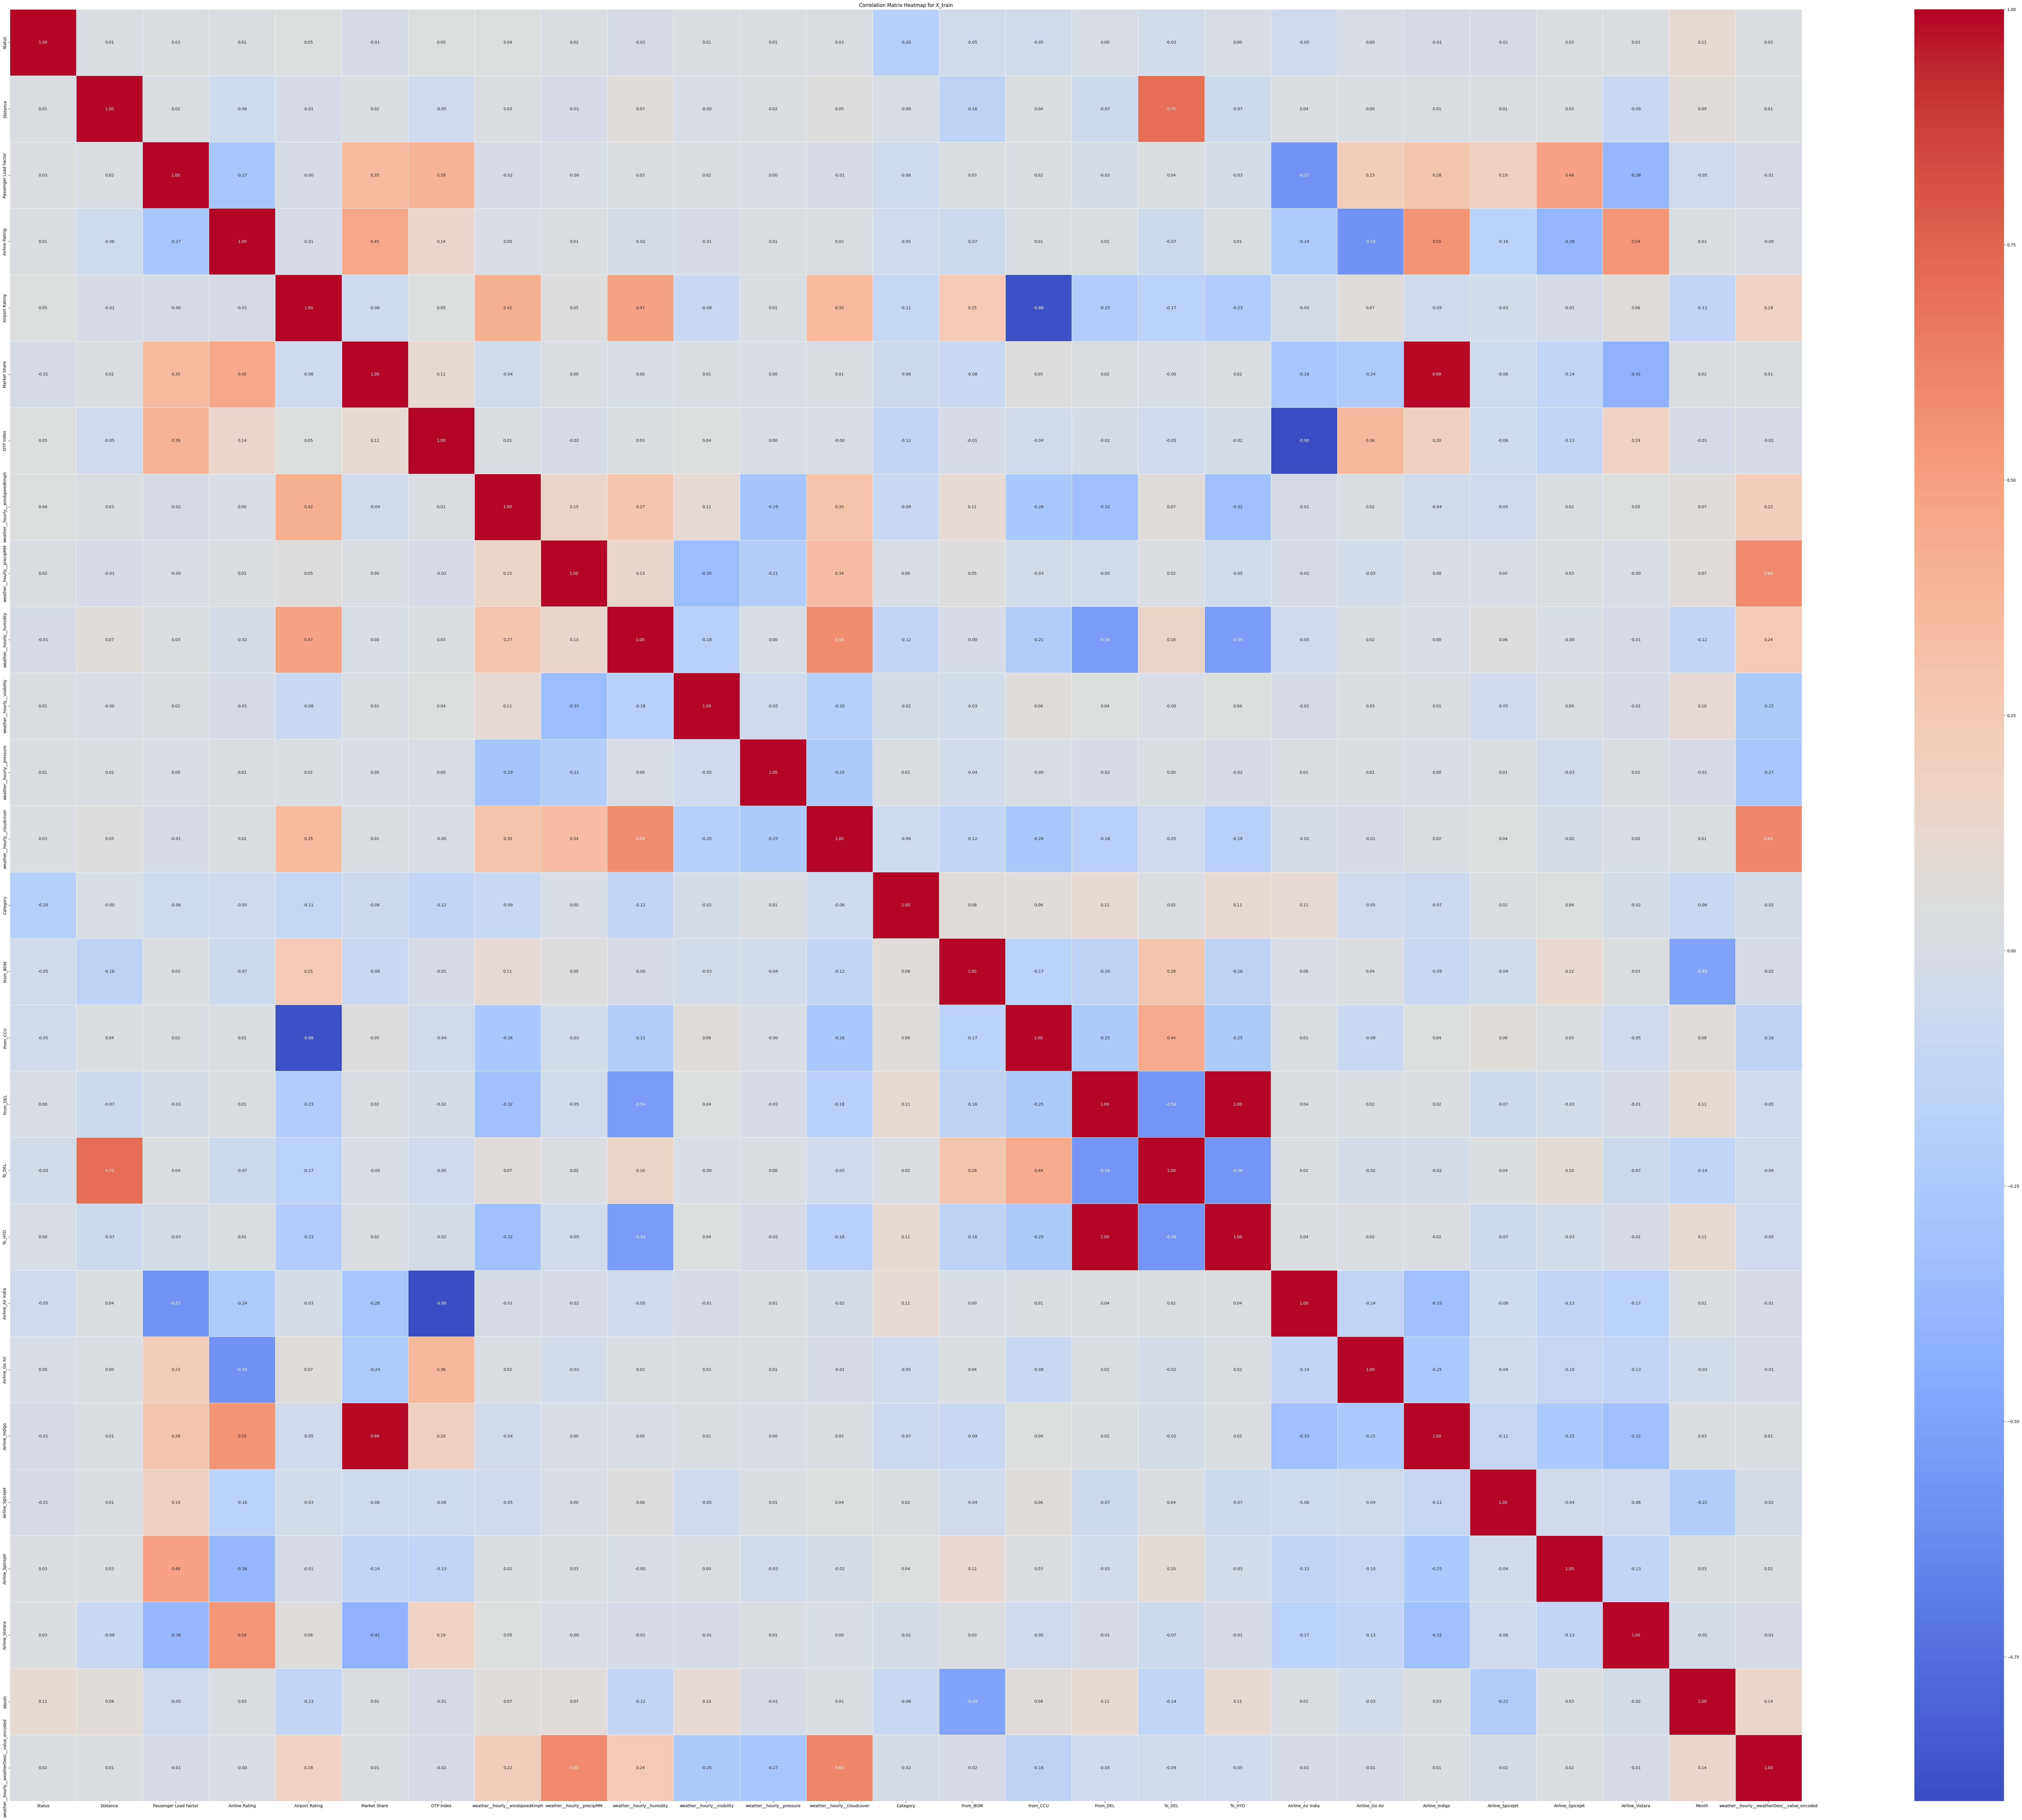

In [ ]:
plt.figure(figsize=(100, 80))  # Set the figure size
sns.heatmap(x_train.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)
plt.title('Correlation Matrix Heatmap for X_train')
plt.show()

In [ ]:
correlation_matrix = x_train.corr()

print(correlation_matrix)


                                               Status  Distance  \
Status                                       1.000000  0.008217   
Distance                                     0.008217  1.000000   
Passenger Load Factor                        0.032163  0.017040   
Airline Rating                               0.011706 -0.060521   
Airport Rating                               0.045918 -0.005126   
Market Share                                -0.010841  0.024020   
OTP Index                                    0.046301 -0.054348   
weather__hourly__windspeedKmph               0.044901  0.027712   
weather__hourly__precipMM                    0.017191 -0.011555   
weather__hourly__humidity                   -0.006289  0.070229   
weather__hourly__visibility                  0.011622 -0.000387   
weather__hourly__pressure                    0.007611  0.019960   
weather__hourly__cloudcover                  0.025727  0.053566   
Category                                    -0.197802 -0.00109

#MODEL TRAINING

1

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [ ]:


y_train.head()

,Departure Delay
3469,13
2691,3
9829,0
9903,7
10097,0


In [ ]:
model = RandomForestRegressor(random_state=42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Performance with all features:")
print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")

Performance with all features:
Mean Absolute Error: 7.136762057789311
R² Score: 0.9630962364528914


In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score

In [ ]:
print("training",np.mean(cross_val_score(model, x_train, y_train, cv=5, scoring='r2')))
print("testing",np.mean(cross_val_score(model, x_test, y_test, cv=5, scoring='r2')))

training 0.9693591880936536
testing 0.8378917444494721


In [ ]:
def get_duplicate_columns(df):
    duplicate_columns = {}
    seen_columns = {}

    for column in df.columns:
        current_column = df[column]

        # Convert column data to bytes
        try:
            current_column_hash = current_column.values.tobytes()
        except AttributeError:
            current_column_hash = current_column.to_string().encode()

        if current_column_hash in seen_columns:
            if seen_columns[current_column_hash] in duplicate_columns:
                duplicate_columns[seen_columns[current_column_hash]].append(column)
            else:
                duplicate_columns[seen_columns[current_column_hash]] = [column]
        else:
            seen_columns[current_column_hash] = column

    return duplicate_columns

In [ ]:
x_train.shape

(8574, 27)

In [ ]:
duplicate_columns = get_duplicate_columns(x_train)
print(duplicate_columns)

{'From_DEL': ['To_HYD']}


In [ ]:
print(duplicate_columns.values())

dict_values([['To_HYD']])


In [ ]:
for one_list in duplicate_columns.values():
    x_train.drop(columns=one_list,inplace=True)
    x_test.drop(columns=one_list,inplace=True)

In [ ]:
x_train.shape

(8574, 26)

In [ ]:
corr_matrix = x_train.corr()
print(corr_matrix)

                                               Status  Distance  \
Status                                       1.000000  0.008217   
Distance                                     0.008217  1.000000   
Passenger Load Factor                        0.032163  0.017040   
Airline Rating                               0.011706 -0.060521   
Airport Rating                               0.045918 -0.005126   
Market Share                                -0.010841  0.024020   
OTP Index                                    0.046301 -0.054348   
weather__hourly__windspeedKmph               0.044901  0.027712   
weather__hourly__precipMM                    0.017191 -0.011555   
weather__hourly__humidity                   -0.006289  0.070229   
weather__hourly__visibility                  0.011622 -0.000387   
weather__hourly__pressure                    0.007611  0.019960   
weather__hourly__cloudcover                  0.025727  0.053566   
Category                                    -0.197802 -0.00109

In [ ]:
columns = corr_matrix.columns

columns_to_drop = []

for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        if corr_matrix.loc[columns[i], columns[j]] > 0.8:
            columns_to_drop.append(columns[j])

print(len(columns_to_drop))
columns_to_drop = set(columns_to_drop)

1


In [ ]:
columns_to_drop

{'Airline_Indigo'}

In [ ]:
x_train.drop(columns = columns_to_drop, axis = 1, inplace=True)
x_test.drop(columns = columns_to_drop, axis = 1, inplace=True)

#EVALUATION AND TESTING

In [ ]:

print("training",np.mean(cross_val_score(model, x_train, y_train, cv=5, scoring='r2')))
print("testing",np.mean(cross_val_score(model, x_test, y_test, cv=5, scoring='r2')))

training 0.9693959041312219
testing 0.848662750649716


In [ ]:
!pip install -q optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.7/404.7 kB 11.2 MB/s eta 0:00:00


In [ ]:
import optuna
import numpy as np

from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    BaggingRegressor,
    RandomForestRegressor,
    GradientBoostingRegressor,
    AdaBoostRegressor
)
from sklearn.linear_model import SGDRegressor
from xgboost import XGBRegressor


def objective(trial):

    # -------------------------------
    # Model as hyperparameter
    # -------------------------------
    model_name = trial.suggest_categorical(
        "model",
        ["bagging", "random_forest", "xgb", "gbr", "adaboost", "sgd"]
    )

    # -------------------------------
    # Model definitions
    # -------------------------------
    if model_name == "bagging":
        base = DecisionTreeRegressor(
            max_depth=trial.suggest_int("bag_base_depth", 5, 30),
            random_state=42
        )
        model = BaggingRegressor(
            estimator=base,
            n_estimators=trial.suggest_int("bag_n_estimators", 50, 300),
            random_state=42,
            n_jobs=-1
        )

    elif model_name == "random_forest":
        model = RandomForestRegressor(
            n_estimators=trial.suggest_int("rf_n_estimators", 100, 500),
            max_depth=trial.suggest_int("rf_max_depth", 5, 40),
            min_samples_split=trial.suggest_int("rf_min_split", 2, 10),
            min_samples_leaf=trial.suggest_int("rf_min_leaf", 1, 5),
            random_state=42,
            n_jobs=-1
        )

    elif model_name == "xgb":
        model = XGBRegressor(
            n_estimators=trial.suggest_int("xgb_n_estimators", 100, 500),
            max_depth=trial.suggest_int("xgb_max_depth", 3, 10),
            learning_rate=trial.suggest_float("xgb_lr", 0.01, 0.3, log=True),
            subsample=trial.suggest_float("xgb_subsample", 0.6, 1.0),
            colsample_bytree=trial.suggest_float("xgb_colsample", 0.6, 1.0),
            objective="reg:squarederror",
            tree_method="hist",
            random_state=42,
            n_jobs=-1,
            verbosity=0
        )

    elif model_name == "gbr":
        model = GradientBoostingRegressor(
            n_estimators=trial.suggest_int("gbr_n_estimators", 100, 400),
            learning_rate=trial.suggest_float("gbr_lr", 0.01, 0.3, log=True),
            max_depth=trial.suggest_int("gbr_max_depth", 2, 6),
            subsample=trial.suggest_float("gbr_subsample", 0.6, 1.0),
            random_state=42
        )

    elif model_name == "adaboost":
        base = DecisionTreeRegressor(
            max_depth=trial.suggest_int("ada_base_depth", 1, 5),
            random_state=42
        )
        model = AdaBoostRegressor(
            estimator=base,
            n_estimators=trial.suggest_int("ada_n_estimators", 50, 400),
            learning_rate=trial.suggest_float("ada_lr", 0.01, 1.0, log=True),
            random_state=42
        )

    else:  # SGD
        model = SGDRegressor(
            alpha=trial.suggest_float("sgd_alpha", 1e-5, 1e-1, log=True),
            penalty=trial.suggest_categorical(
                "sgd_penalty", ["l2", "l1", "elasticnet"]
            ),
            max_iter=trial.suggest_int("sgd_max_iter", 1000, 5000),
            random_state=42
        )

    # -------------------------------
    # Cross-validation
    # -------------------------------
    cv = cross_validate(
        model,
        x_train,          # ✅ CORRECT VARIABLE
        y_train,
        cv=5,
        scoring={
            "r2": "r2",
            "rmse": "neg_root_mean_squared_error"
        },
        n_jobs=-1
    )

    cv_r2 = cv["test_r2"].mean()
    cv_rmse = -cv["test_rmse"].mean()

    # -------------------------------
    # Adjusted R²
    # -------------------------------
    n, p = x_train.shape
    adj_r2 = 1 - (1 - cv_r2) * (n - 1) / (n - p - 1)

    trial.set_user_attr("rmse", cv_rmse)
    trial.set_user_attr("adjusted_r2", adj_r2)

    return cv_r2


# -------------------------------
# Run Optuna
# -------------------------------
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

# -------------------------------
# Best result
# -------------------------------
best = study.best_trial

print("\n===== BEST MODEL FOUND =====")
print("Model           :", best.params["model"])
print("Mean CV R²      :", best.value)
print("Adjusted R²     :", best.user_attrs["adjusted_r2"])
print("Mean CV RMSE    :", best.user_attrs["rmse"])
print("Best Parameters :")
for k, v in best.params.items():
    print(f"  {k}: {v}")


[I 2025-12-27 12:49:39,178] A new study created in memory with name: no-name-52544824-d29f-42bd-953a-12cbc04a02d1
[I 2025-12-27 12:50:48,203] Trial 0 finished with value: 0.969346289131795 and parameters: {'model': 'random_forest', 'rf_n_estimators': 286, 'rf_max_depth': 20, 'rf_min_split': 6, 'rf_min_leaf': 4}. Best is trial 0 with value: 0.969346289131795.
[I 2025-12-27 12:50:50,349] Trial 1 finished with value: 0.9544681283503393 and parameters: {'model': 'sgd', 'sgd_alpha': 1.841562635653184e-05, 'sgd_penalty': 'l2', 'sgd_max_iter': 1920}. Best is trial 0 with value: 0.969346289131795.
[I 2025-12-27 12:51:23,702] Trial 2 finished with value: 0.9693145387801255 and parameters: {'model': 'bagging', 'bag_base_depth': 26, 'bag_n_estimators': 156}. Best is trial 0 with value: 0.969346289131795.
[I 2025-12-27 12:51:34,805] Trial 3 finished with value: 0.9686534062928089 and parameters: {'model': 'gbr', 'gbr_n_estimators': 155, 'gbr_lr': 0.051274683633927745, 'gbr_max_depth': 5, 'gbr_subs


===== BEST MODEL FOUND =====
Model           : bagging
Mean CV R²      : 0.9707519852895296
Adjusted R²     : 0.9706664447692018
Mean CV RMSE    : 19.92029626933637
Best Parameters :
  model: bagging
  bag_base_depth: 8
  bag_n_estimators: 98


In [ ]:
from optuna.visualization import plot_optimization_history, plot_param_importances,plot_parallel_coordinate,plot_contour

In [ ]:
plot_optimization_history(study).show()

In [ ]:
plot_param_importances(study,params=["bag_base_depth", "bag_n_estimators",])

In [ ]:
plot_contour(study, params=["bag_base_depth", "bag_n_estimators"]).show()

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

# Get the best parameters from the Optuna study
best_params = study.best_trial.params
model_name = best_params['model']

# Instantiate the best model with its specific parameters
if model_name == 'bagging':
    base_estimator = DecisionTreeRegressor(
        max_depth=best_params['bag_base_depth'],
        random_state=42
    )
    best_model = BaggingRegressor(
        estimator=base_estimator,
        n_estimators=best_params['bag_n_estimators'],
        random_state=42,
        n_jobs=-1
    )
else:
    raise ValueError(f"Model type '{model_name}' not explicitly handled for instantiation.")

# Train the best model
best_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(x_test)

# Evaluate the model using appropriate regression metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate Adjusted R²
n = x_train.shape[0]
p = x_train.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("Performance with best model from Optuna:")
print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")
print(f"Adjusted R² Score: {adjusted_r2}")

Performance with best model from Optuna:
Mean Absolute Error: 7.206456529463978
R² Score: 0.9605706556210284
Adjusted R² Score: 0.9604553381655447


In [ ]:
def predict_arrival_delay(input_data):
    # Get the feature names used during training
    training_feature_names = best_rf_model.feature_names_in_

    # Convert training_feature_names to a list if it's not already
    training_feature_names = list(training_feature_names)

    # Check for missing columns in input_data
    missing_cols = [col for col in training_feature_names if col not in input_data.columns]
    if missing_cols:
        raise KeyError(f"The following columns are missing in the input data: {missing_cols}")

    # Select only the relevant columns from the input data
    input_data_subset = input_data[training_feature_names]

    # Scale the relevant columns
    input_data_scaled = scaler.transform(input_data_subset[columns_to_standardize])
    input_data_subset[columns_to_standardize] = input_data_scaled

    return best_rf_model.predict(input_data_subset)  # Use the subset with correct columns

In [ ]:
def predict_arrival_delay(input_data):
    # Get the feature names used during training from the best_model
    training_feature_names = best_model.feature_names_in_

    # Convert training_feature_names to a list if it's not already
    training_feature_names = list(training_feature_names)

    # Check for missing columns in input_data
    missing_cols = [col for col in training_feature_names if col not in input_data.columns]
    if missing_cols:
        # For missing columns, add them to the input_data DataFrame with a default value (e.g., 0)
        # This handles cases where dummy variables might not be present in a single input row
        for col in missing_cols:
            input_data[col] = 0

    # Select only the relevant columns from the input data and ensure their order
    input_data_subset = input_data[training_feature_names]

    # Create a copy to avoid SettingWithCopyWarning
    input_data_scaled = input_data_subset.copy()

    # Scale the relevant columns. Ensure columns_to_standardize only contains columns present in input_data_scaled.
    cols_to_scale_present = [col for col in columns_to_standardize if col in input_data_scaled.columns]
    if cols_to_scale_present:
        input_data_scaled[cols_to_scale_present] = scaler.transform(input_data_scaled[cols_to_scale_present])

    return best_model.predict(input_data_scaled)

In [ ]:
# Display actual and predicted arrival delays side by side
results_df = pd.DataFrame({
    'Actual Arrival Delay': y_test,
    'Predicted Arrival Delay': y_pred
}).reset_index(drop=True)

# Show the first few rows of actual vs. predicted
print(results_df.head())

   Actual Arrival Delay  Predicted Arrival Delay
0                     0                -1.120826
1                    -3                -1.678140
2                     7                 7.067790
3                    10                 8.748996
4                     5                 7.141521


In [ ]:
# Display actual and predicted arrival delays side by side
results_df = pd.DataFrame({
    'Actual Arrival Delay': y_test,
    'Predicted Arrival Delay': y_pred
}).reset_index(drop=True)

# Show the first few rows of actual vs. predicted
print(results_df.head())

   Actual Arrival Delay  Predicted Arrival Delay
0                     0                -1.120826
1                    -3                -1.678140
2                     7                 7.067790
3                    10                 8.748996
4                     5                 7.141521


In [ ]:
# Import the joblib library
import joblib

# Save the model and scaler
joblib.dump(best_model, 'best_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("Model and scaler saved successfully.")

Model and scaler saved successfully.


#DELAY CATEGORIZATION

In [ ]:
!pip install pgmpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 31.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 32.5 MB/s eta 0:00:00


In [ ]:
from pgmpy.estimators import HillClimbSearch, BIC
from pgmpy.models import BayesianNetwork

# Perform structure learning on X_train only
hc = HillClimbSearch(x_train)
best_model = hc.estimate(scoring_method=BIC(x_train))

# Display the learned structure (edges)
print("Learned Structure:", best_model.edges())

  0%|          | 0/1000000 [00:00<?, ?it/s]

Learned Structure: [('Distance', 'Airport Rating'), ('Distance', 'To_DEL'), ('Distance', 'From_BOM'), ('Distance', 'weather__hourly__weatherDesc__value_encoded'), ('Distance', 'Category'), ('Passenger Load Factor', 'Market Share'), ('Passenger Load Factor', 'Month'), ('Airline Rating', 'OTP Index'), ('Airline Rating', 'Airline_Vistara'), ('Airline Rating', 'Airline_Go Air'), ('Airport Rating', 'From_CCU'), ('Airport Rating', 'From_DEL'), ('Airport Rating', 'weather__hourly__humidity'), ('Airport Rating', 'weather__hourly__windspeedKmph'), ('Airport Rating', 'weather__hourly__pressure'), ('Airport Rating', 'weather__hourly__cloudcover'), ('Market Share', 'Airline Rating'), ('Market Share', 'Airline_Spicejet'), ('Market Share', 'Airline_SpiceJet'), ('OTP Index', 'Airline_Air India'), ('Category', 'Status'), ('Airline_Air India', 'Category'), ('Airline_Spicejet', 'Distance'), ('Month', 'Distance'), ('weather__hourly__weatherDesc__value_encoded', 'weather__hourly__precipMM'), ('weather__ho

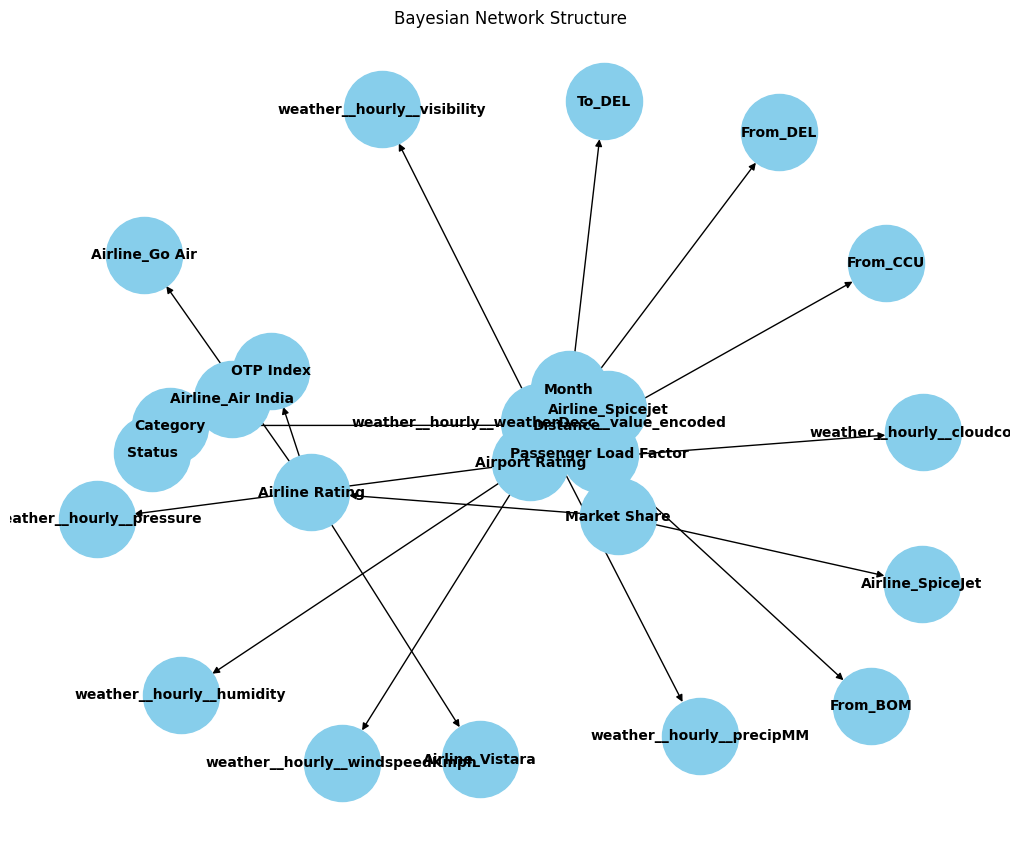

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Convert pgmpy Bayesian Network model to networkx graph for visualization
graph = nx.DiGraph()  # Directed graph for Bayesian Network
graph.add_edges_from(best_model.edges())  # Add edges to the graph

# Plot the Bayesian Network structure
plt.figure(figsize=(10, 8))
nx.draw(graph, with_labels=True, node_size=3000, node_color="skyblue", font_size=10, font_weight="bold", arrows=True)
plt.title("Bayesian Network Structure")
plt.show()



In [ ]:
from pgmpy.estimators import MaximumLikelihoodEstimator, BayesianEstimator
from pgmpy.models import DiscreteBayesianNetwork

# Initialize the Bayesian Network model with the learned structure
model = DiscreteBayesianNetwork(best_model.edges())

# Fit the model using Maximum Likelihood Estimator
model.fit(x_train, estimator=MaximumLikelihoodEstimator)


In [ ]:
from pgmpy.inference import VariableElimination

# Use Variable Elimination for inference on the fitted model
inference = VariableElimination(model)
delay_reason_proxies = {
    "Weather-related": ["weather__hourly__windspeedKmph", "weather__hourly__precipMM", "weather__hourly__visibility", "weather__hourly__humidity"],
    "Operational": ["Airline Rating", "OTP Index", "Airport Rating"],
    "Route-related": ["From_BOM", "From_DEL", "To_DEL", "Distance"]
}

# Dictionary to store delay reason probabilities for each row
row_delay_reasons = []

# Calculate probabilities for each row in X_test
for i, row in x_train.iterrows():
    evidence = row.to_dict()  # Convert row to dictionary for evidence
    reason_probabilities = {}

    for reason, nodes in delay_reason_proxies.items():
        group_prob = 1.0
        for node in nodes:
            try:
                node_prob = inference.query(variables=[node], evidence=evidence).values[1]  # Adjust for binary or non-binary
                group_prob *= node_prob
            except:
                group_prob *= 1  # Default to neutral if a query fails

        reason_probabilities[reason] = group_prob

    # Determine the most probable delay reason for this row
    most_probable_reason = max(reason_probabilities, key=reason_probabilities.get)
    row_delay_reasons.append((i, most_probable_reason, reason_probabilities[most_probable_reason]))

# Display the results
print(row_delay_reasons)


[(3469, 'Weather-related', 1.0), (2691, 'Weather-related', 1.0), (9829, 'Weather-related', 1.0), (9903, 'Weather-related', 1.0), (10097, 'Weather-related', 1.0), (4808, 'Weather-related', 1.0), (10106, 'Weather-related', 1.0), (9019, 'Weather-related', 1.0), (3706, 'Weather-related', 1.0), (1034, 'Weather-related', 1.0), (3934, 'Weather-related', 1.0), (3107, 'Weather-related', 1.0), (2458, 'Weather-related', 1.0), (906, 'Weather-related', 1.0), (7201, 'Weather-related', 1.0), (7839, 'Weather-related', 1.0), (9699, 'Weather-related', 1.0), (6688, 'Weather-related', 1.0), (10308, 'Weather-related', 1.0), (4139, 'Weather-related', 1.0), (10624, 'Weather-related', 1.0), (8975, 'Weather-related', 1.0), (2957, 'Weather-related', 1.0), (2271, 'Weather-related', 1.0), (4900, 'Weather-related', 1.0), (4870, 'Weather-related', 1.0), (2522, 'Weather-related', 1.0), (8822, 'Weather-related', 1.0), (3208, 'Weather-related', 1.0), (1901, 'Weather-related', 1.0), (9895, 'Weather-related', 1.0), (156